In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dsata Set for Assignment 1.csv')


# Feature Engineering Task 1:

In [3]:
#We first need to undersatand the number of missing values in each column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#The NULL values are only present in continuous numerical values, so we fill it with the mean of exsisting values in the column
df_new=df
df_new['radius_mean'] = df_new['radius_mean'].replace(np.NaN, df_new['radius_mean'].mean())
df_new['perimeter_mean'] = df_new['perimeter_mean'].replace(np.NaN, df_new['perimeter_mean'].mean())
df_new['concavity_mean'] = df_new['concavity_mean'].replace(np.NaN, df_new['concavity_mean'].mean())
df_new['compactness_se'] = df_new['compactness_se'].replace(np.NaN, df_new['compactness_se'].mean())
df_new['area_worst'] = df_new['area_worst'].replace(np.NaN, df_new['area_worst'].mean())
df_new['concavity_worst'] = df_new['concavity_worst'].replace(np.NaN, df_new['concavity_worst'].mean())

In [9]:
# We have successfully added the missing values
df.isnull().sum().sum()

0

In [10]:
df_new.to_csv(r'ds.csv', index=False)

# Feature Engineering Task 2

In [11]:
# Normalizing all the features and saving it in a new DataFrame
normalized_df=df_new
normalized_df.iloc[:,2:]=df_new.iloc[:,2:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [12]:
# The Normalized DataSet is shown below
normalized_df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M     1.102422     -2.071512        1.268389   0.983510   
1      842517         M     1.836635     -0.353322        1.684639   1.907030   
2    84300903         M     1.586206      0.455786        1.565122   1.557513   
3    84348301         M    -0.767260      0.253509       -0.595257  -0.763792   
4    84358402         M     1.756953     -1.150804        1.775308   1.824624   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     2.118368      0.720838        2.059677   2.341795   
565    926682         M     1.711420      2.083301        1.614577   1.722326   
566    926954         M     0.706858      2.043775        0.670803   0.577445   
567    927241         M     1.845172      2.334403        1.981372   1.733693   
568     92751         B    -1.808817      1.220718       -1.817631  -1.346604  

# Part A - Perceptron Learning Algorithm:

# Part B – Fisher’s Linear Discriminant Analysis:

C:\Users\bhask\AppData\Local\Temp\ipykernel_22568\1822300576.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax0.scatter(Y[0][y_train==l],


NameError: name 'intercept' is not defined

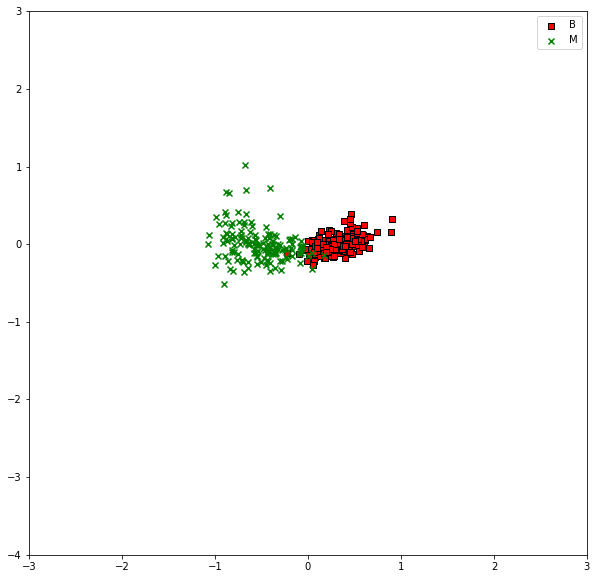

In [58]:
def LDA(X, target):
	from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 
    # 1. Standardize the data
from sklearn.preprocessing import StandardScaler
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))
    # 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(30,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 

mu_k = []

for i,orchid in enumerate(np.unique(df['diagnosis'])):
    mu_k.append(np.mean(X_train.where(df['diagnosis']==orchid),axis=0))
mu_k = np.array(mu_k).T

# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['diagnosis'])):
    a = np.array(X_train.where(df['diagnosis']==orchid).dropna().values-mu_k[:,i].reshape(1,30))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['diagnosis']==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)
   
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


    
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g'],['s','x']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')

for i, c in enumerate(['r','g','b']):
    b = intercept
    w1 = coef[i][0]
    w2 = coef_[i][1]
    
    y1 = -(b+x1*w1)/w2 

plt.show()

In [48]:
X = df.iloc[:,2:].copy()
target = df['diagnosis'].copy()
LDA(X, target)